#  Plotting with `pandas`


Pandas provides built-in plotting capabilities that make it easy to visualize data stored in DataFrames and Series. It leverages the `matplotlib` library under the hood, allowing users to create a variety of plots with minimal code.

The framework for plotting is data-centric, meaning that plots are generated directly from the data structures in pandas. This allows for quick and efficient visualization of data without needing to manually extract and format data for plotting. 

Compared to what you have already seen in `matplotlib`, pandas plotting is often more straightforward and requires less boilerplate code. It means, however, that fine tuning is sometimes less flexible than using `matplotlib` directly.

## Plotting with Series

The basic `pandas` object is the Series. Series have a `.plot()` method that can be used to create various types of plots.

A    10
B    25
C    15
D    30
E    20
dtype: int64


<Axes: >

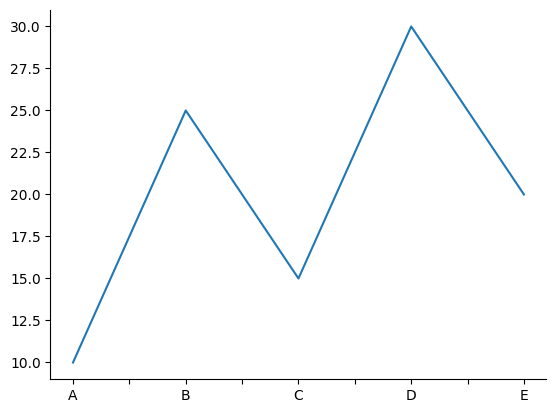

In [2]:
import pandas as pd


# Create an example series
series = pd.Series([10, 25, 15, 30, 20], index=['A', 'B', 'C', 'D', 'E'])
print(series)

series.plot()

We notice a few features:

- the `plot()` method is called directly on the pandas object (in this case, a Series).
- without any additional arguments, it defaults to a line plot and it uses:
    - the index of the Series for the x-axis,
    - the values of the Series for the y-axis.
- labels are inferred automatically for the axes (in this case the categorical names of the x-axis)


The `.plot()` method has various parameters. The most important one is `kind`, which specifies the type of plot to create. Some common plot types include: 
- `'line'`: Line plot (default)
- `'bar'`: Vertical bar plot
- `'barh'`: Horizontal bar plot
- `'hist'`: Histogram
- `'box'`: Box plot
- `'scatter'`: Scatter plot (requires `x` and `y` parameters)
- `'pie'`: Pie chart

Other parameters allow customization of the plot, such as titles, labels, colors, and more.

Let's see some examples:

<Axes: title={'center': 'Bar Plot of Series'}, xlabel='Categories', ylabel='Values'>

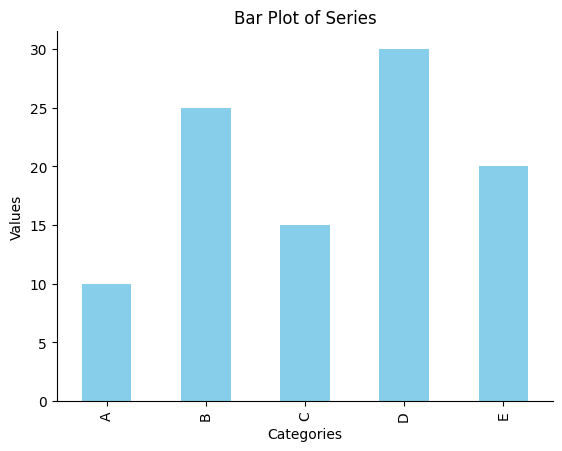

In [3]:
series.plot(kind='bar', title='Bar Plot of Series', color='skyblue', xlabel='Categories', ylabel='Values')

<Axes: title={'center': 'Pie Chart of Series'}>

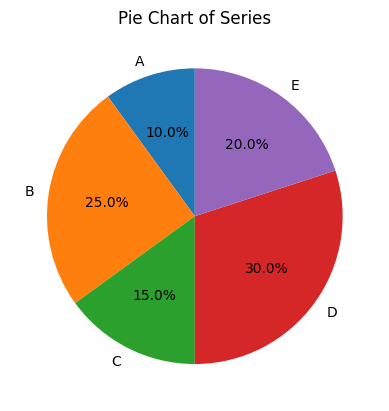

In [6]:
series.plot(kind='pie', title='Pie Chart of Series', autopct='%1.1f%%', startangle=90)

A **box** plot is diffeeent is it allows one to view the distribution of the data in a simplified form: it shows the median, quartiles, and potential outliers of the data i a single plot.

<Axes: title={'center': 'Box Plot of Series'}>

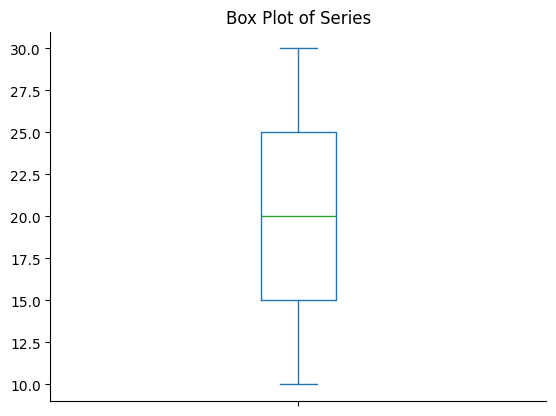

In [4]:
series.plot(kind='box', title='Box Plot of Series')

## Plotting with DataFrames

As we have seen earlier, when working with `pandas` we typically use Dataframes (i.e. collections of Series). DataFrames also have a `.plot()` method that can be used to create various types of plots.

When plotting a DataFrame, the default behavior is to plot each column as a separate line (or bar, etc.) on the same axes. The index of the DataFrame is used for the x-axis.

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

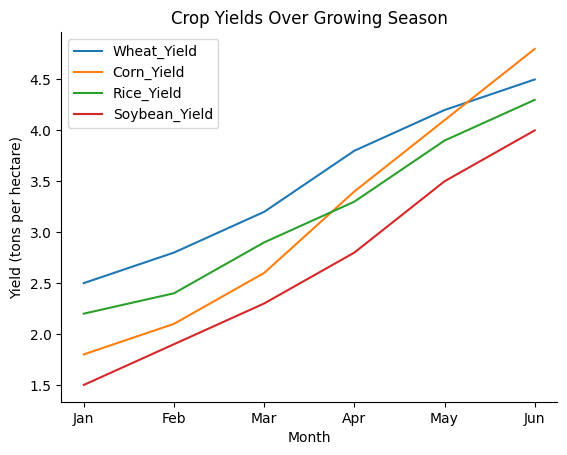

In [13]:
# Create a DataFrame with crop yield data across different months
df = pd.DataFrame({
    'Month': ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun'],
    'Wheat_Yield': [2.5, 2.8, 3.2, 3.8, 4.2, 4.5],
    'Corn_Yield': [1.8, 2.1, 2.6, 3.4, 4.1, 4.8],
    'Rice_Yield': [2.2, 2.4, 2.9, 3.3, 3.9, 4.3],
    'Soybean_Yield': [1.5, 1.9, 2.3, 2.8, 3.5, 4.0]
})


# Plot the DataFrame
df.plot(x='Month', kind='line', 
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')


Notice that we obly had to specify the variable on the x-axis and pandas inferred the res, consructing a legend automatically.

You can have more control and specify which columns to plot on the x and y axes using the `x` and `y` parameters.

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

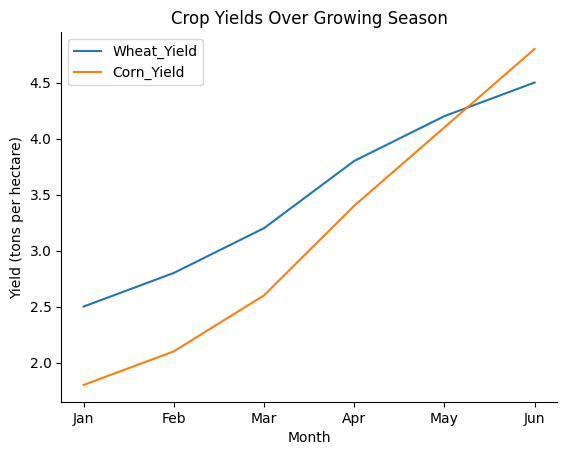

In [16]:
df.plot( kind='line',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')

Suppose we also wanted the data points to be marked with circles, we could use the `style` parameter:

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

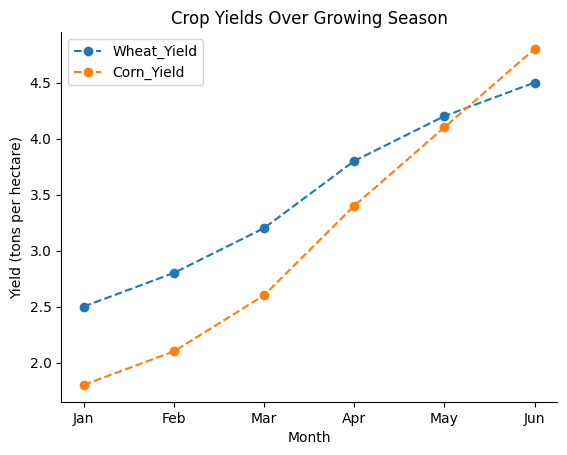

In [18]:
df.plot( kind='line',
        style='--o',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)')

Additional parameters can be used to tune the figure property, e.g. the figure size:

<Axes: title={'center': 'Crop Yields Over Growing Season'}, xlabel='Month', ylabel='Yield (tons per hectare)'>

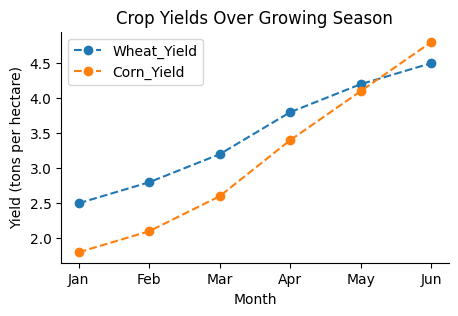

In [20]:
df.plot( kind='line',
        style='--o',
        x='Month',
        y=['Wheat_Yield', 'Corn_Yield'],
        title='Crop Yields Over Growing Season', 
        xlabel='Month', ylabel='Yield (tons per hectare)',
        figsize=(5,3))

## Subplots

In `matplotlib`, one can create multiple axes in a single figure using subplots. Pandas also supports this functionality through the `subplots` parameter in the `.plot()` method.

When `subplots=True` is specified, each column of the DataFrame is plotted in its own subplot.

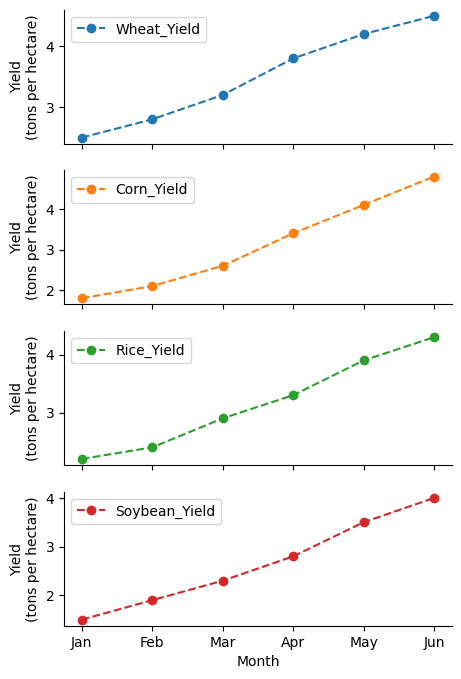

In [ ]:
df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        figsize=(5,8)
        
        )

We can specify the structure of the subplot grid using the `layout` parameter, which takes a tuple indicating the number of rows and columns.

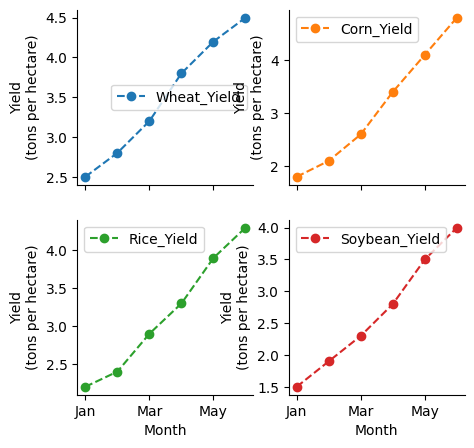

In [41]:
df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        layout =(2,2),
        figsize=(5,5)
        
        );

But what if we want to refine the individual subplots? For example, we may be unhappy with the labels of the various plots here. We need to store the results of the plotting operation and then modify each axis individually.

The result of the `.plot()` method when `subplots=True` is an array of `matplotlib` Axes objects, which can be further customized.

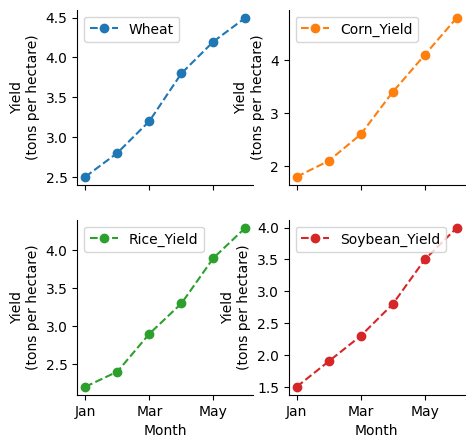

In [56]:
# capturing the Axes object
axes = df.plot( kind='line',
        style='--o',
        x='Month',
        xlabel='Month', 
        ylabel='Yield\n(tons per hectare)',
        subplots=True,
        layout =(2,2),
        figsize=(5,5)
        )

# modify the label in the first subplot
axes[0,0].get_lines()[0].set_label('Wheat')  # we use get_lines() to access the line objects, pick the first (and only ) one, and set its label

axes[0,0].legend()  # then we need to call legend() to update the legend with the new label

It is clear that in this sense, it may be useful to think of good column names when planning to plot data from a DataFrame.

In [49]:
axes

array([[<Axes: xlabel='Month', ylabel='Yield\n(tons per hectare)'>,
        <Axes: xlabel='Month', ylabel='Yield\n(tons per hectare)'>],
       [<Axes: xlabel='Month', ylabel='Yield\n(tons per hectare)'>,
        <Axes: xlabel='Month', ylabel='Yield\n(tons per hectare)'>]],
      dtype=object)